# 1. Encoding Categorical Features(mean encoding )

Mean Encoding, also known as Target Encoding, is a technique used to convert categorical features into numerical features based on the relationship between the categories and the target variable. For each category in the categorical feature, it calculates the mean of the target variable for all the data points belonging to that category and uses this mean as the encoded value for the category.

How Mean Encoding Works:

1. Group by Category: For the categorical feature you want to encode, group the data by each unique category.
2. Calculate Mean of Target: For each group (category), calculate the mean of the target variable.
3. Create a Mapping: Create a dictionary or a similar mapping where the keys are the unique categories and the values are the calculated means of the target variable for those categories.
4. Replace Categories with Means: Iterate through the original categorical column and replace each category with its corresponding mean value from the mapping.

Example (Men's Sports Apparel Product Type and Sales):

Consider a dataset with 'Product_Type' and 'Sales' (our target variable):

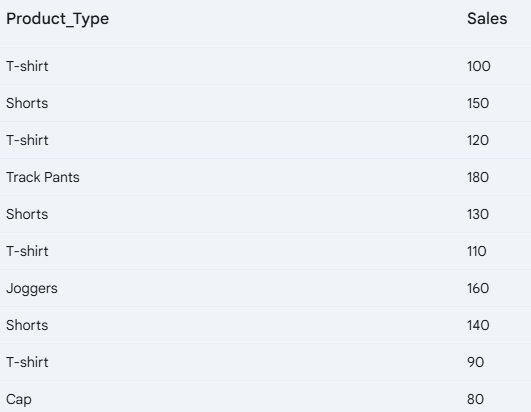

Applying mean encoding to 'Product_Type' using 'Sales' as the target:

1. Group by Category and Calculate Mean Sales:

T-shirt: (100 + 120 + 110 + 90) / 4 = 105

Shorts: (150 + 130 + 140) / 3 = 140

Track Pants: 180 / 1 = 180

Joggers: 160 / 1 = 160

Cap: 80 / 1 = 80

Mapping:

{'T-shirt': 105, 'Shorts': 140, 'Track Pants': 180, 'Joggers': 160, 'Cap': 80}

Encoded Column:

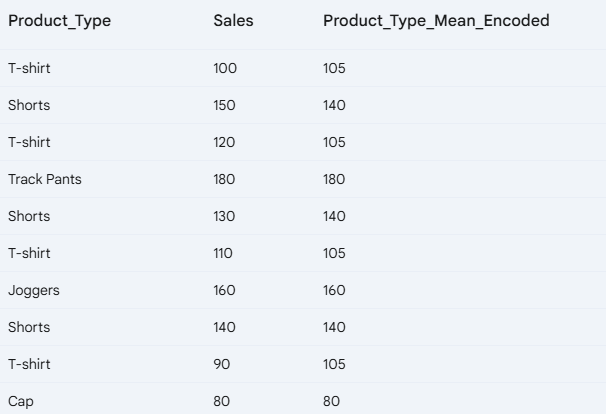

Why Use Mean Encoding?

1. Captures Relationship with Target: Mean encoding directly uses the relationship between the categorical feature and the target variable to create the numerical representation. This can be very informative for predictive modeling.
2. Can Work Well with High Cardinality: Unlike one-hot encoding, mean encoding doesn't increase the dimensionality significantly, making it suitable for categorical features with a large number of unique categories.
3. Potential for Good Performance: In many cases, mean encoding can lead to better performance compared to other simple encoding techniques.

Limitations and Considerations (Crucial!):

1. Overfitting: This is the most significant risk with mean encoding. The encoded values are directly derived from the target variable in the training data. This can lead to the encoded features being highly correlated with the target in the training set, but this relationship might not generalize well to unseen data (test set). Categories with very few data points are particularly susceptible to overfitting.
2. Data Leakage: If you calculate the means using the entire dataset (including the test set) before splitting, you will introduce data leakage, leading to overly optimistic performance estimates. Mean encoding should always be performed within each fold of cross-validation or after splitting the data into training and testing sets, using only the training data to calculate the means.
3. Handling Rare Categories: Categories with very few occurrences might have unstable mean estimates.

When to Consider Mean Encoding:

1. High Cardinality Categorical Features: When one-hot encoding would create too many features.
2. Predictive Modeling: When you believe the relationship between the category and the target is strong and you need to capture this information effectively.
3. Tree-Based Models (with caution): While effective, be mindful of overfitting.

Conclusion:

Mean encoding is a powerful technique that can capture the relationship between a categorical feature and the target variable. However, it is highly prone to overfitting and data leakage if not implemented correctly. Always be mindful of these risks and use appropriate mitigation strategies.

# Import necessary dependencies

In [88]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create sample dataset

In [89]:
# Sample DataFrame representing customer interactions and purchase amounts
data = pd.DataFrame({
    'CustomerID': [1, 2, 1, 3, 2, 4, 1, 3, 4, 2, 1, 3],
    'Product_Type': ['T-shirt', 'Shorts', 'T-shirt', 'Shorts', 'T-shirt', 'Track Pants',
                     'Shorts', 'T-shirt', 'Track Pants', 'Shorts', 'T-shirt', 'Track Pants'],
    'Purchase_Amount': [150, 200, 160, 180, 190, 220, 170, 190, 210, 205, 155, 230],
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'B'] # Another categorical feature
})

print("Original Data:")
data

Original Data:


,CustomerID,Product_Type,Purchase_Amount,Category
0,1,T-shirt,150,A
1,2,Shorts,200,B
2,1,T-shirt,160,A
3,3,Shorts,180,C
4,2,T-shirt,190,B
5,4,Track Pants,220,C
6,1,Shorts,170,A
7,3,T-shirt,190,C
8,4,Track Pants,210,B
9,2,Shorts,205,A


# Categorical Features(Mean encoding) implementation

In [90]:
# 1. Mean Encoding for 'Product_Type'

# Calculate the mean purchase amount for each product type
mean_purchase_by_product = data.groupby('Product_Type')['Purchase_Amount'].mean().to_dict()

# Map the mean purchase amount back to the original DataFrame
data['Product_Type_Mean_Encoded'] = data['Product_Type'].map(mean_purchase_by_product)

print("\nData with Mean Encoding for Product_Type (Without Handling Overfitting):")
data


Data with Mean Encoding for Product_Type (Without Handling Overfitting):


,CustomerID,Product_Type,Purchase_Amount,Category,Product_Type_Mean_Encoded
0,1,T-shirt,150,A,169.00
1,2,Shorts,200,B,188.75
2,1,T-shirt,160,A,169.00
3,3,Shorts,180,C,188.75
4,2,T-shirt,190,B,169.00
5,4,Track Pants,220,C,220.00
6,1,Shorts,170,A,188.75
7,3,T-shirt,190,C,169.00
8,4,Track Pants,210,B,220.00
9,2,Shorts,205,A,188.75


In [94]:
# 2. Mean Encoding for 'Category'

# Calculate the mean purchase amount for each Category
mean_purchase_by_category = data.groupby('Category')['Purchase_Amount'].mean().to_dict()

# Map the mean purchase amount back to the original DataFrame
data['Category_Mean_Encoded'] = data['Category'].map(mean_purchase_by_category)

print("\nData with Mean Encoding for Product_Type (Without Handling Overfitting):")
data


Data with Mean Encoding for Product_Type (Without Handling Overfitting):


,CustomerID,Product_Type,Purchase_Amount,Category,Product_Type_Mean_Encoded,Category_Mean_Encoded
0,1,T-shirt,150,A,169.00,171.25
1,2,Shorts,200,B,188.75,207.50
2,1,T-shirt,160,A,169.00,171.25
3,3,Shorts,180,C,188.75,186.25
4,2,T-shirt,190,B,169.00,207.50
5,4,Track Pants,220,C,220.00,186.25
6,1,Shorts,170,A,188.75,171.25
7,3,T-shirt,190,C,169.00,186.25
8,4,Track Pants,210,B,220.00,207.50
9,2,Shorts,205,A,188.75,171.25
